# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Faris Ghina Purohita
- Email: farisghina51@gmail.com

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import joblib

In [2]:
pip install pandas sqlalchemy

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv")

### Menyiapkan data yang akan diguankan

## Data Understanding

In [4]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

## Data Preparation / Preprocessing

In [6]:
print('Jumlah missing value dari setiap kolom: ', df.isnull().sum())

Jumlah missing value dari setiap kolom:  EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0

In [7]:
#Menghapus missing value pada kolom Attrition
df_cleaned = df.dropna(subset=['Attrition'])

print("\nJumlah missing value pada kolom Attrition setelah pembersihan:")
print(df_cleaned['Attrition'].isna().sum())


Jumlah missing value pada kolom Attrition setelah pembersihan:
0


In [8]:
duplicate_count = df_cleaned.duplicated().sum()
print("Jumlah duplikasi: ", duplicate_count)

Jumlah duplikasi:  0


In [9]:
df_cleaned.describe(include="all")

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058,1058.000000,1058,1058.000000,1058.000000,1058,1058.0,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,746,NaN,701,NaN,NaN,436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,736.656900,37.055766,0.169187,NaN,809.542533,NaN,8.978261,2.879017,NaN,1.0,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,0.375094,NaN,408.478049,NaN,8.040608,1.031442,NaN,0.0,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,NaN,465.250000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,0.000000,NaN,817.500000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,0.000000,NaN,1168.500000,NaN,13.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000


**Univariate Analysis**

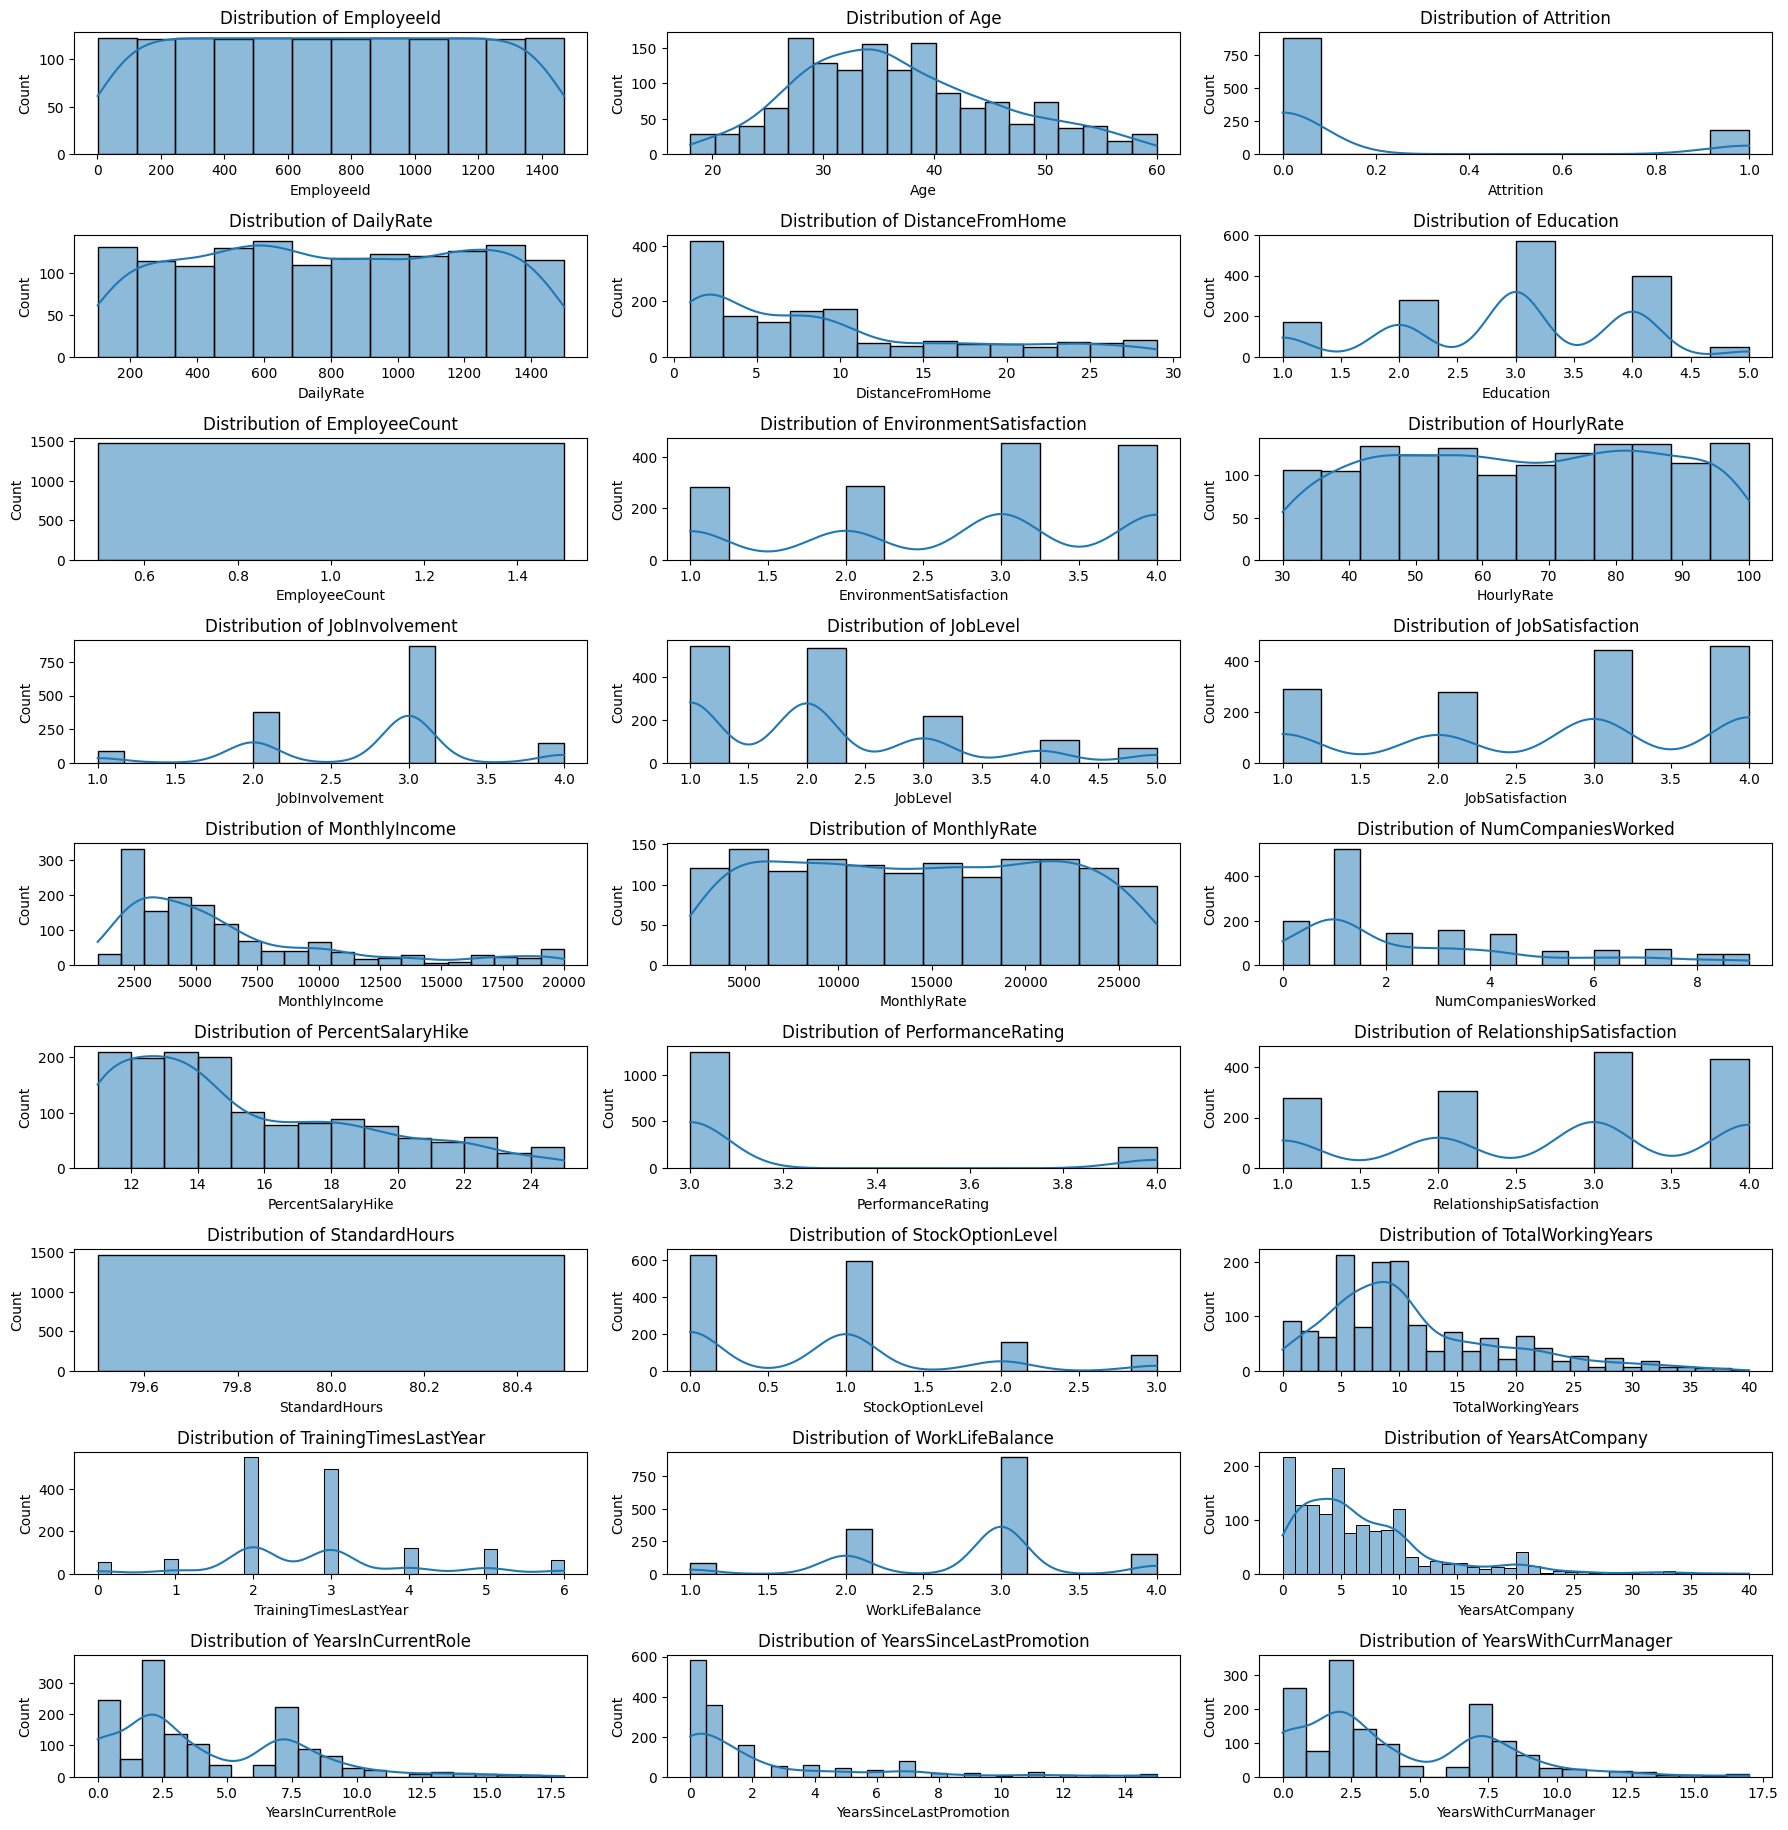

In [10]:
# Identifikasi kolom numerical
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Univariate analysis untuk numerical variables
plt.figure(figsize=(18, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

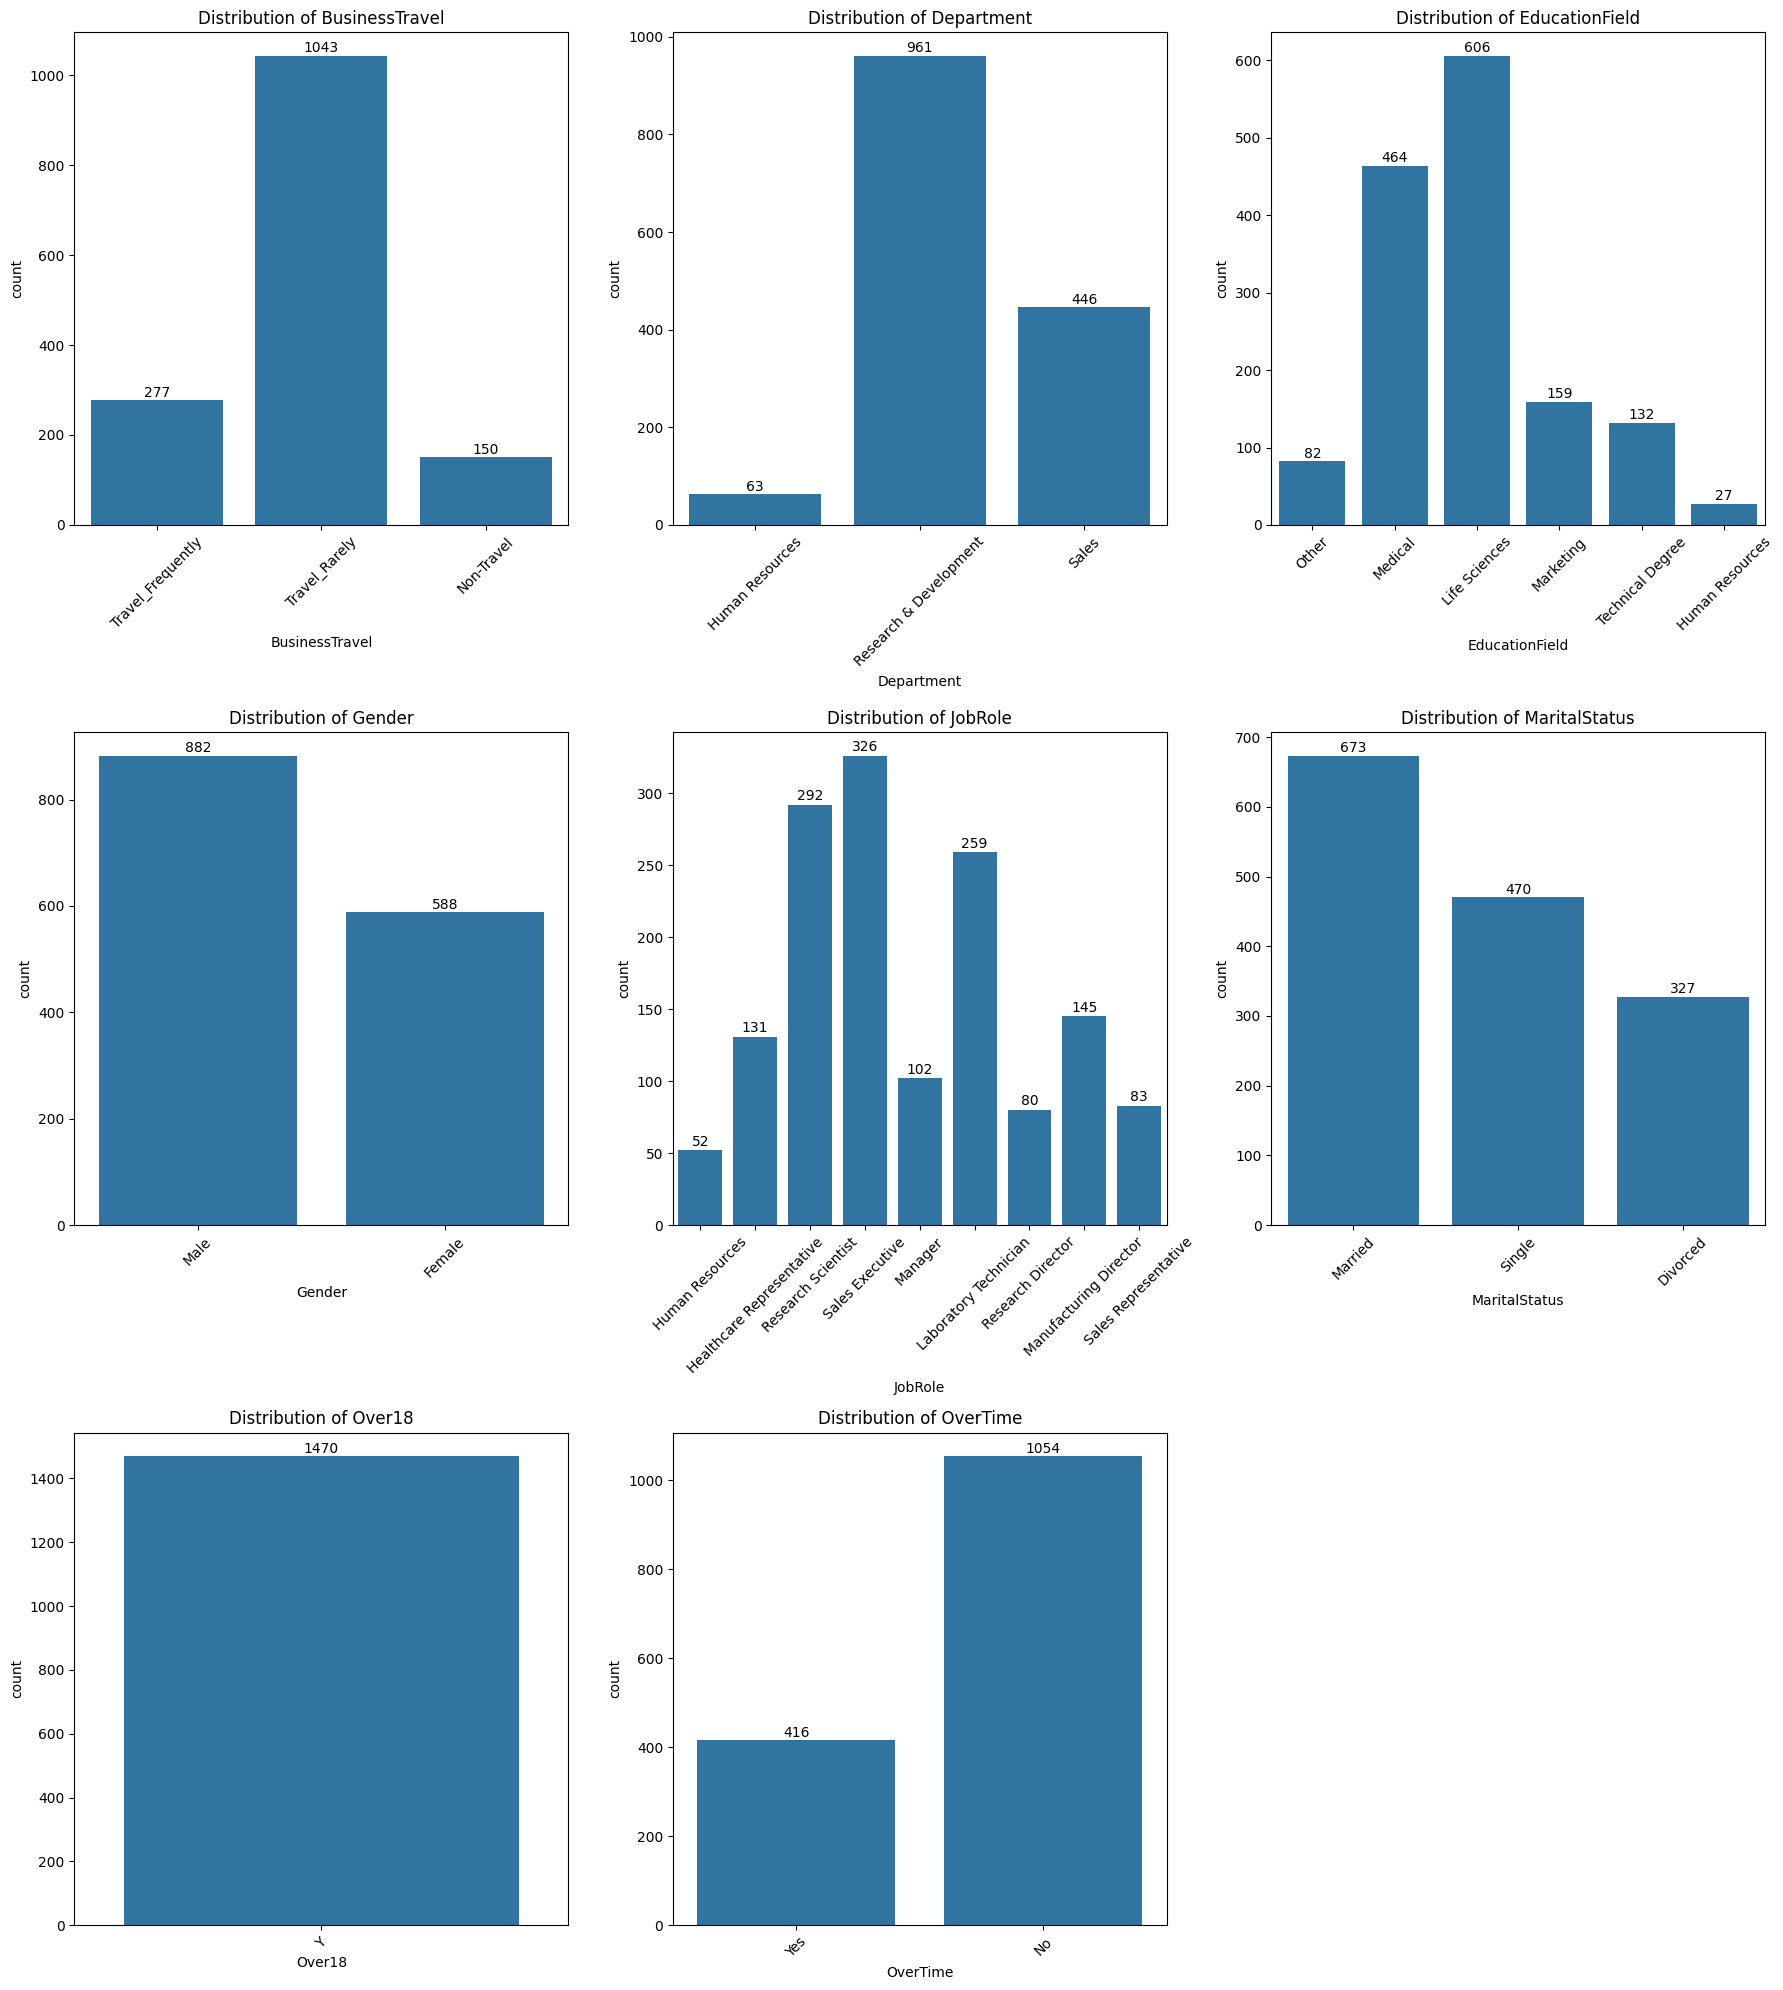

In [11]:
# Identifikasi kolom categorical
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Univariate analysis untuk categorical variables
plt.figure(figsize=(18, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 3 + 1, 3, i)
    ax = sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 1, int(height), ha='center', va='bottom')
plt.tight_layout()
plt.show()

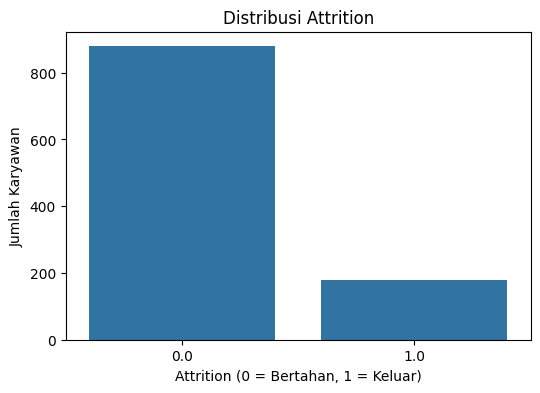

In [12]:
# Visualisasi distribusi Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df_cleaned)
plt.title('Distribusi Attrition')
plt.xlabel('Attrition (0 = Bertahan, 1 = Keluar)')
plt.ylabel('Jumlah Karyawan')
plt.show()

In [13]:
print(df_cleaned.select_dtypes(include=['object']).columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


**Multivariate Analysis**

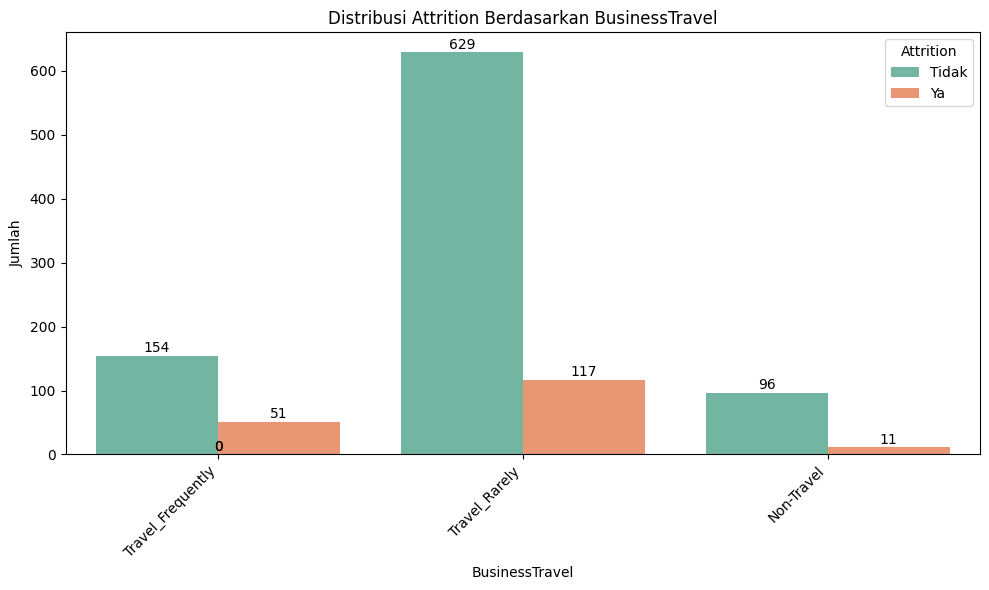

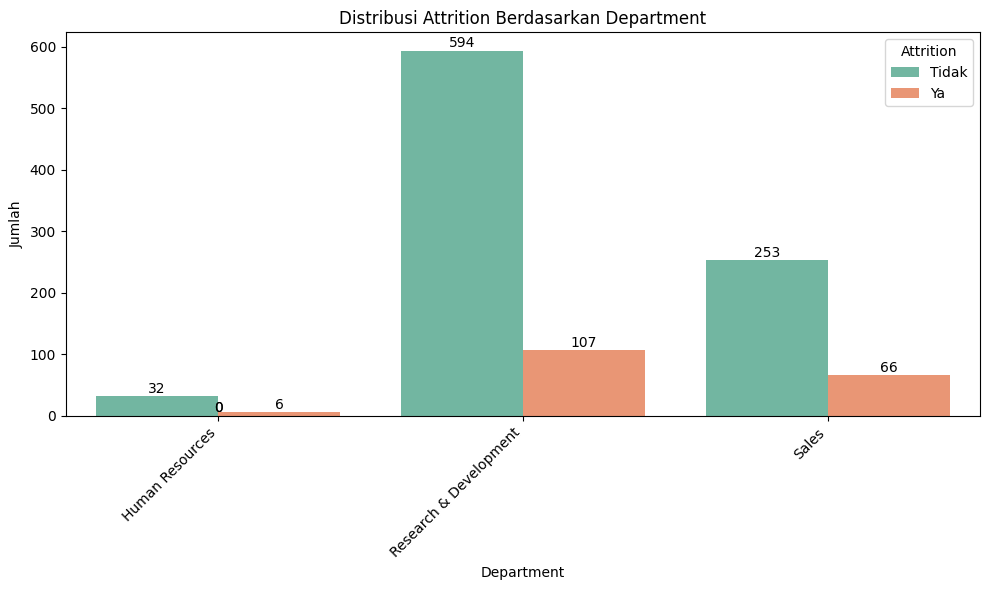

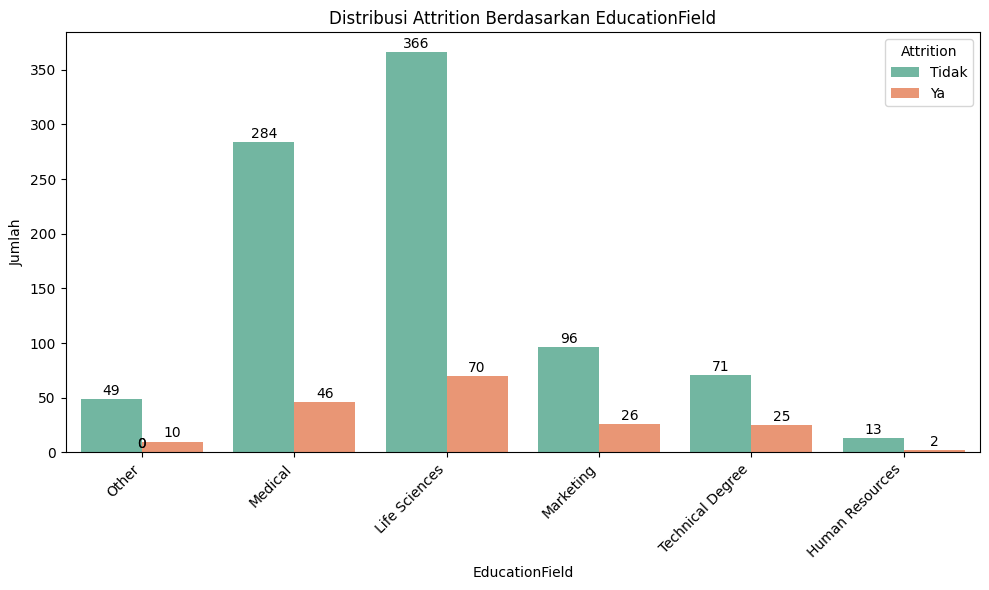

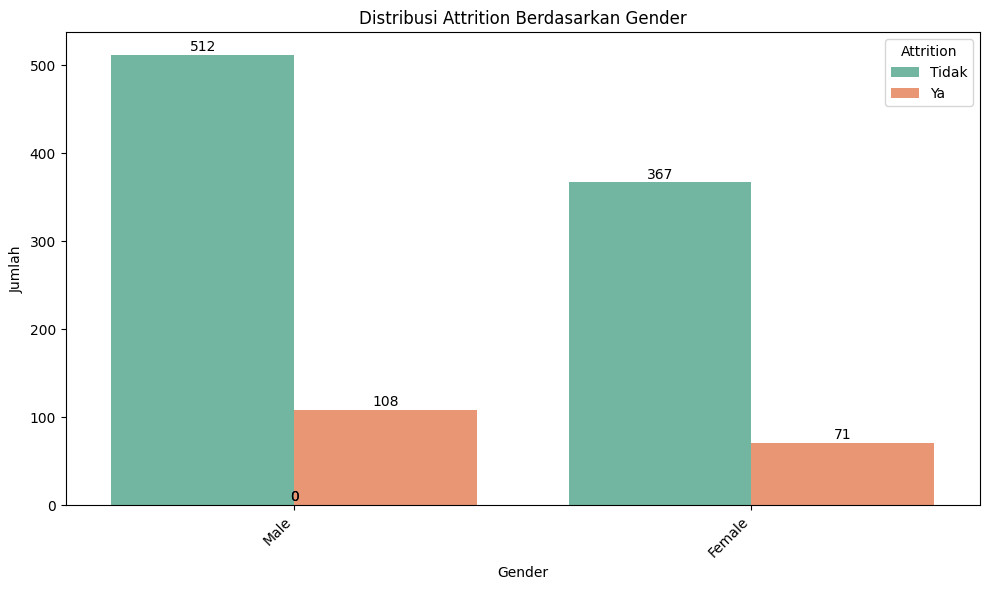

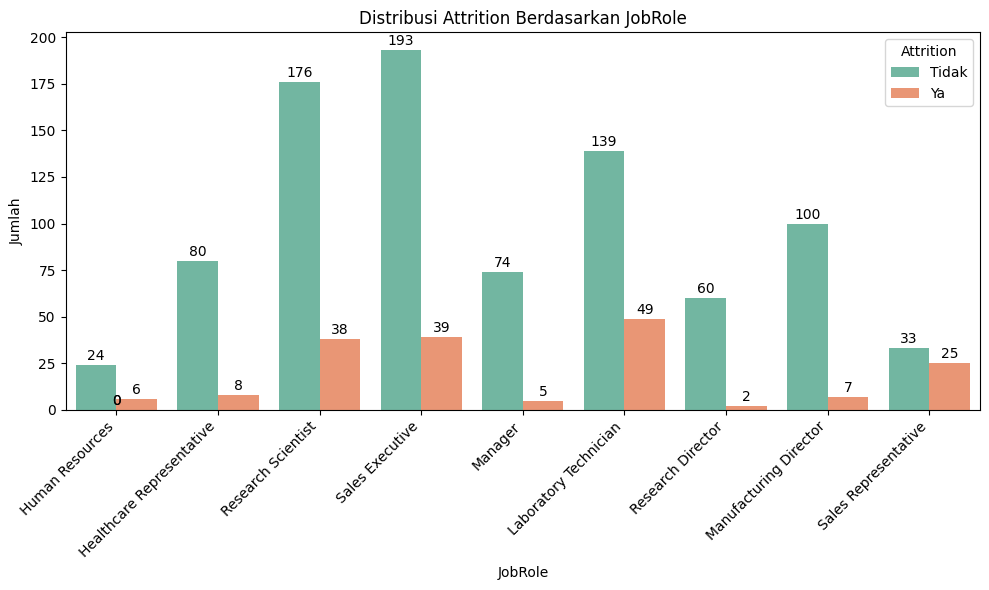

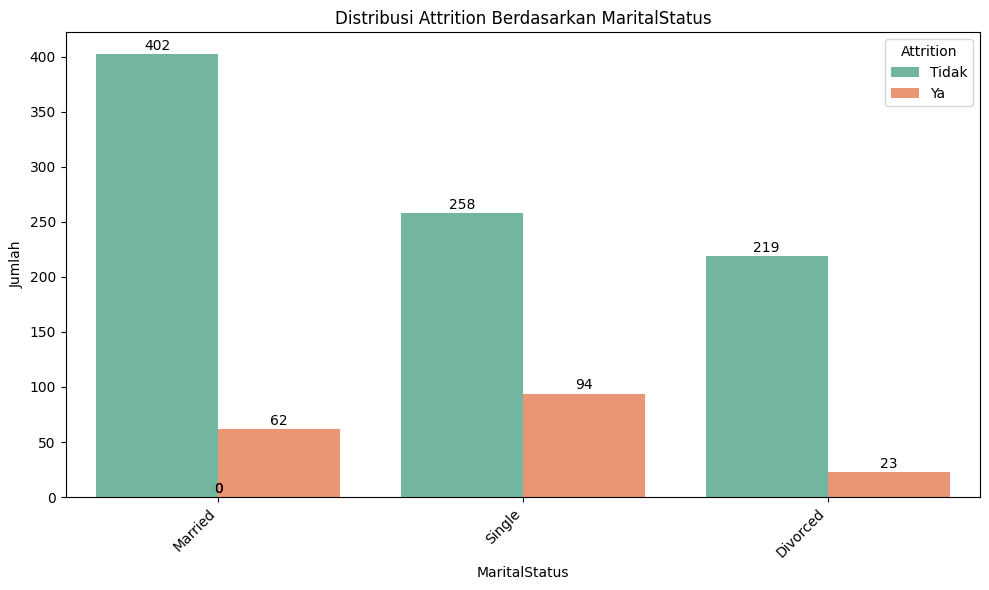

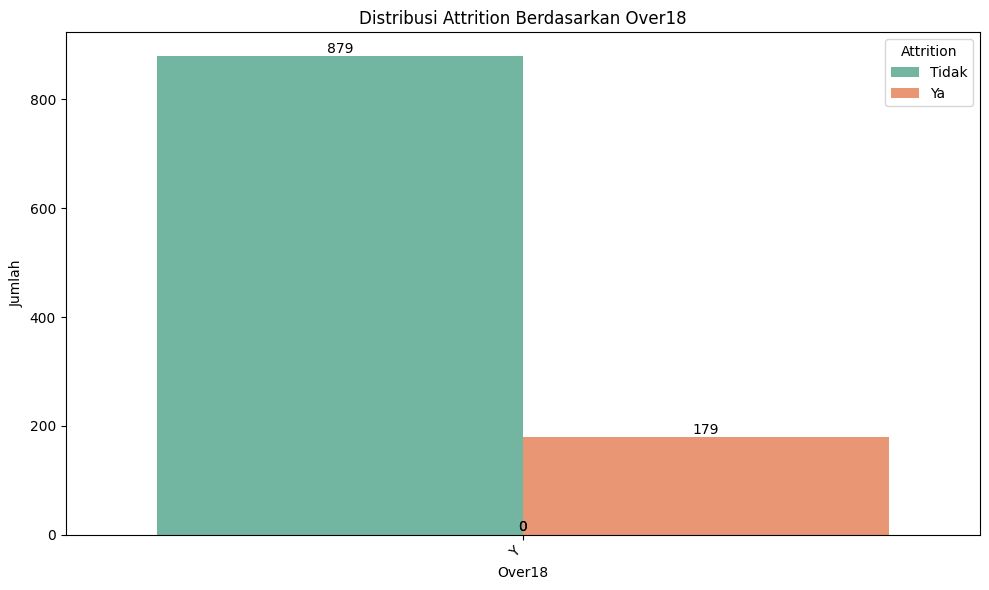

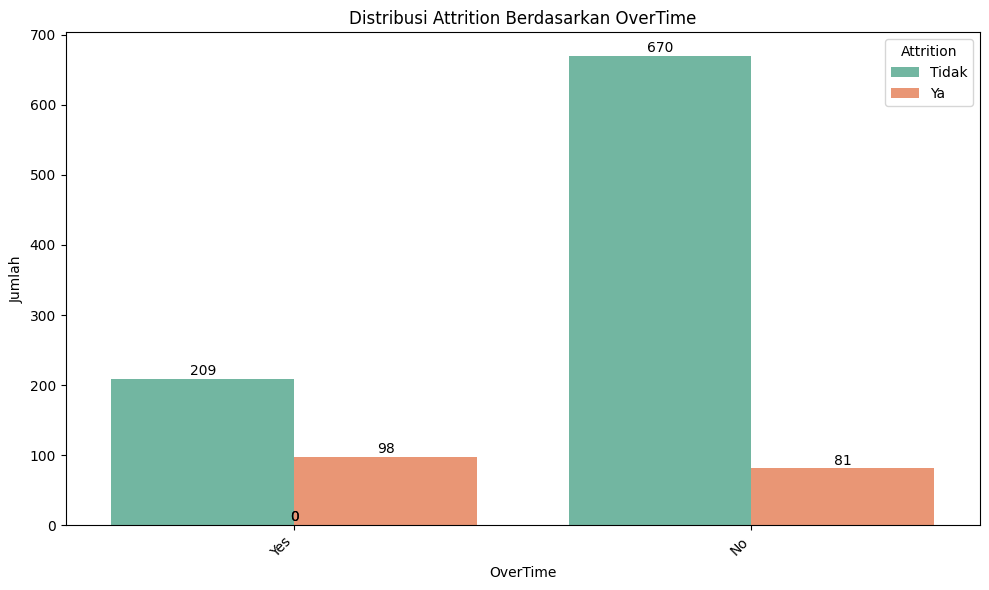

In [14]:
# Identifikasi semua fitur kategorikal dalam dataset
categorical_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Loop untuk membuat barplot setiap fitur kategorikal terhadap Attrition
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=col, hue='Attrition', palette='Set2')
    plt.title(f"Distribusi Attrition Berdasarkan {col}")
    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Attrition', labels=['Tidak', 'Ya'])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 1, int(height), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

In [15]:
# # Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
# sns.pairplot(df_cleaned, diag_kind = 'kde')

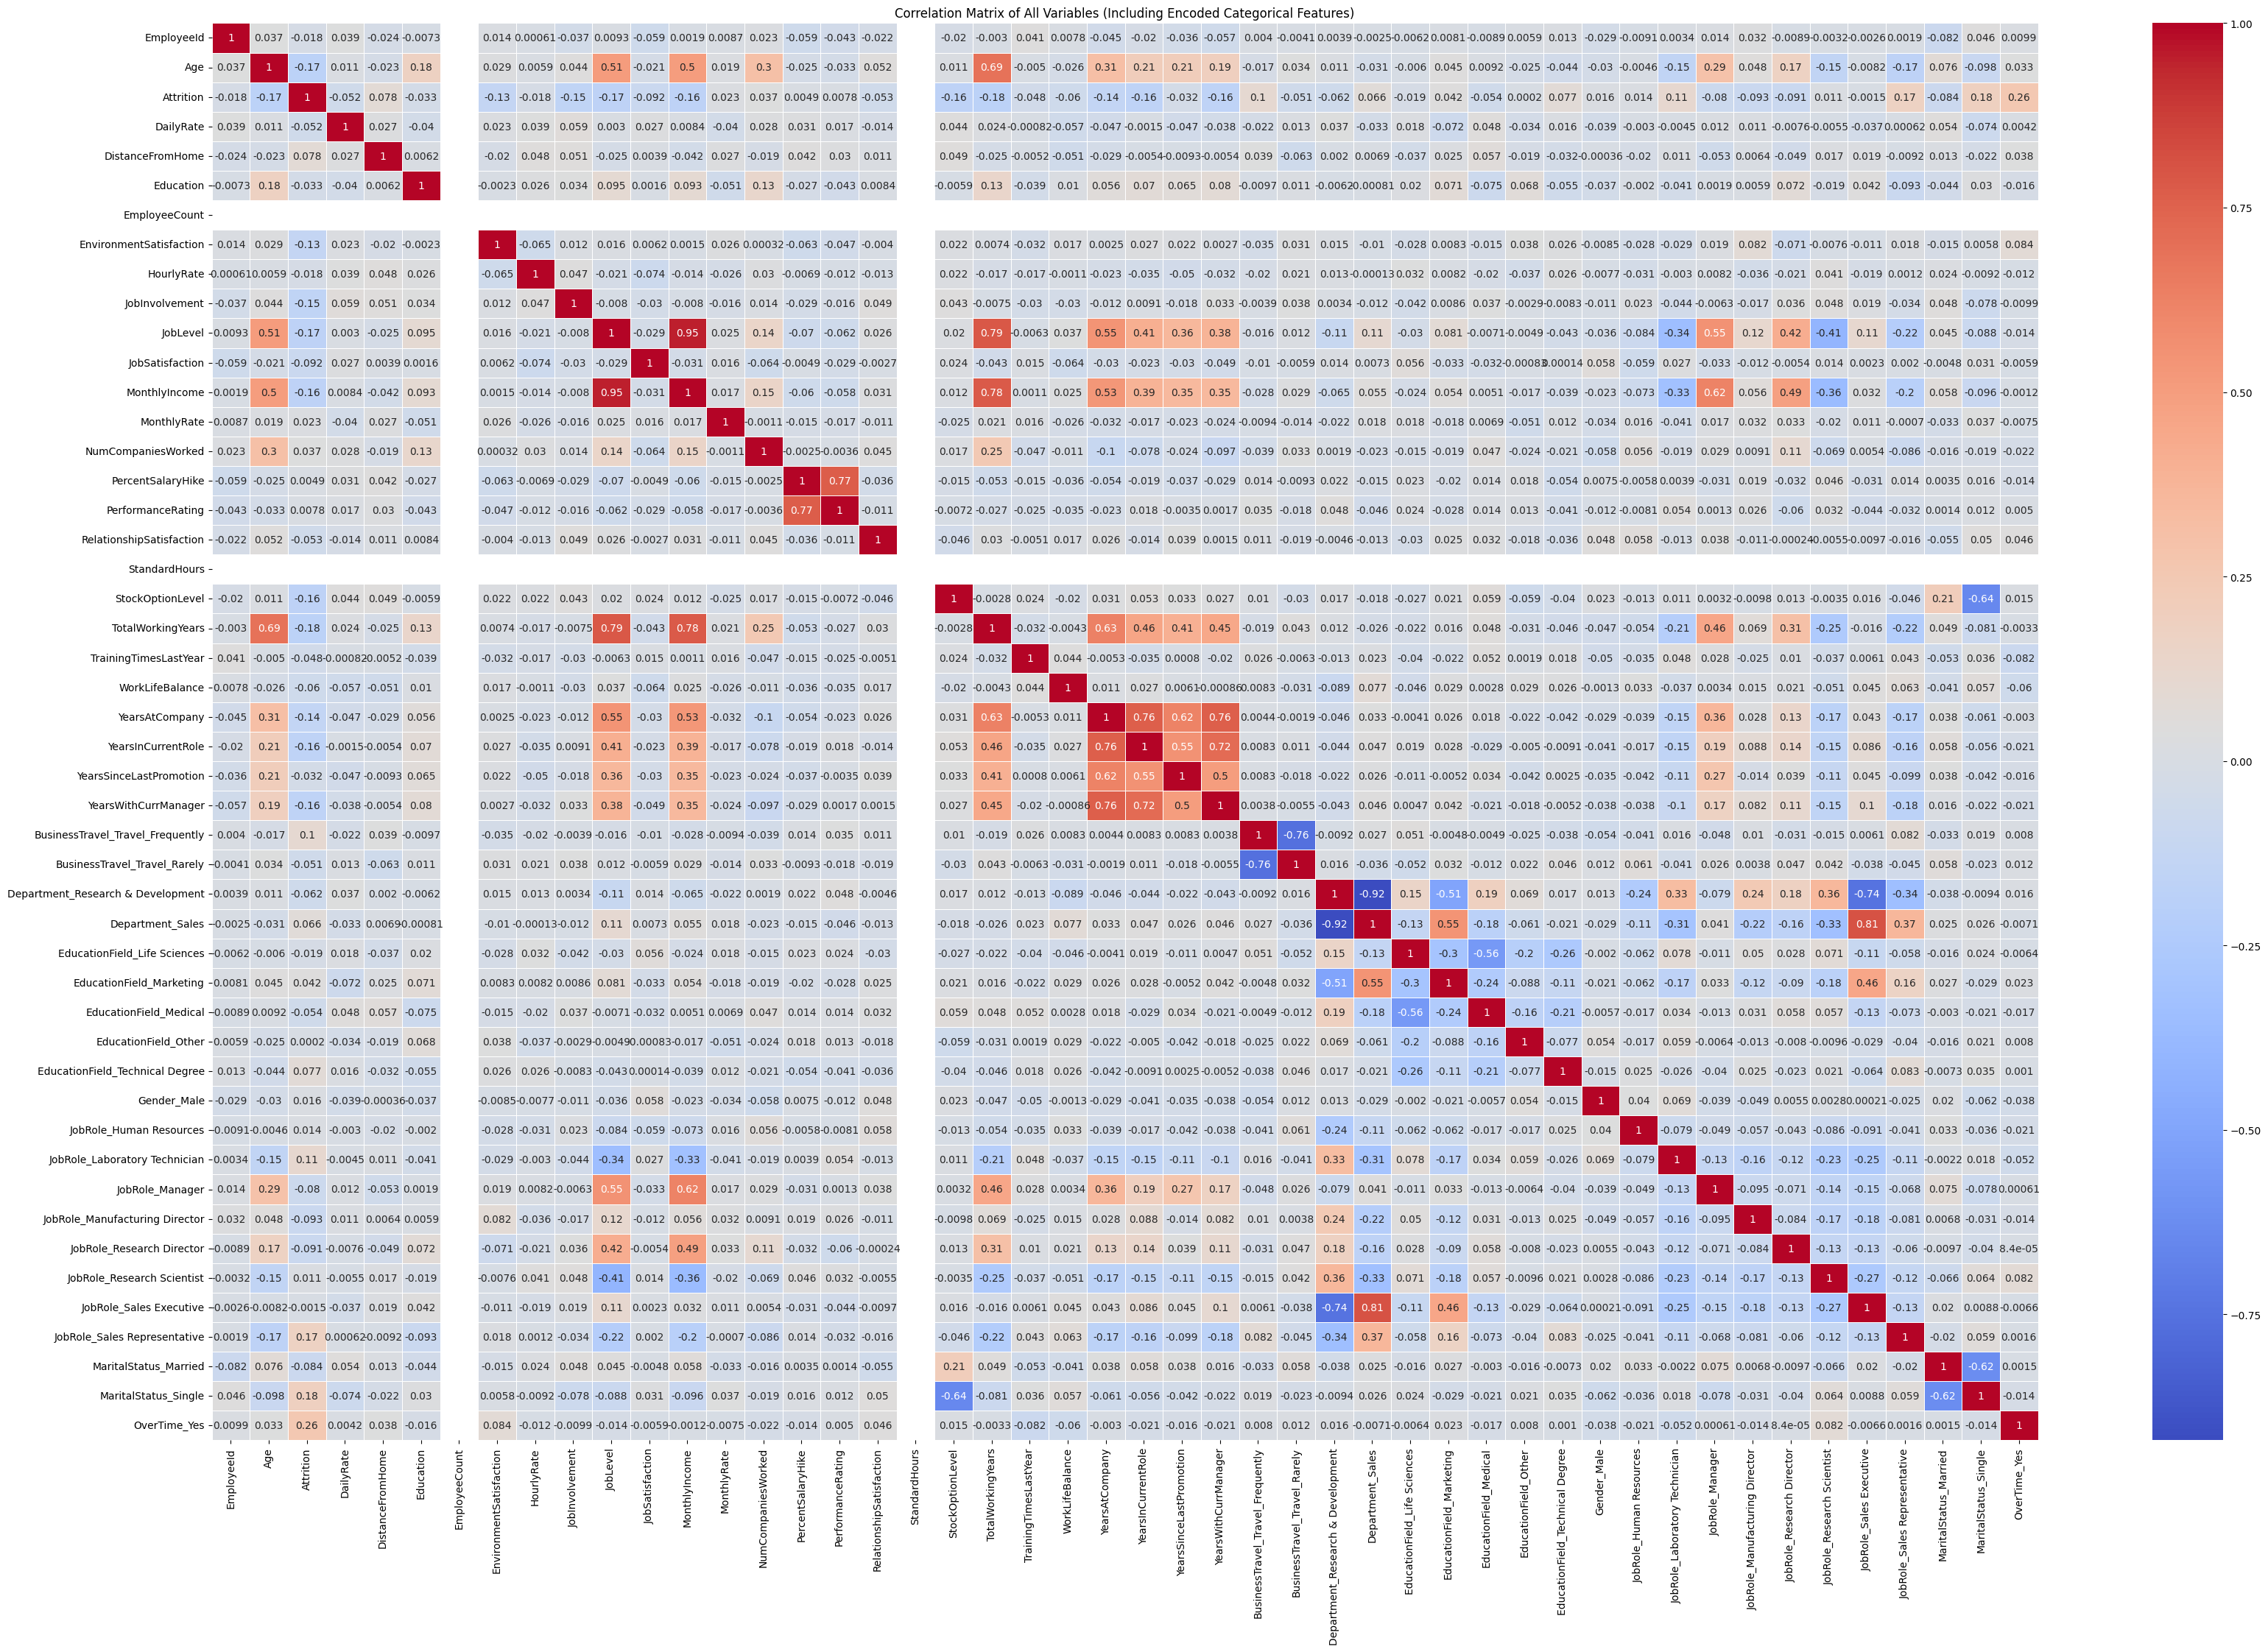

In [16]:
# Identifikasi fitur numerik dan kategorikal
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = df_encoded.corr()

# Plot matriks korelasi
plt.figure(figsize=(40, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Variables (Including Encoded Categorical Features)')
plt.show()

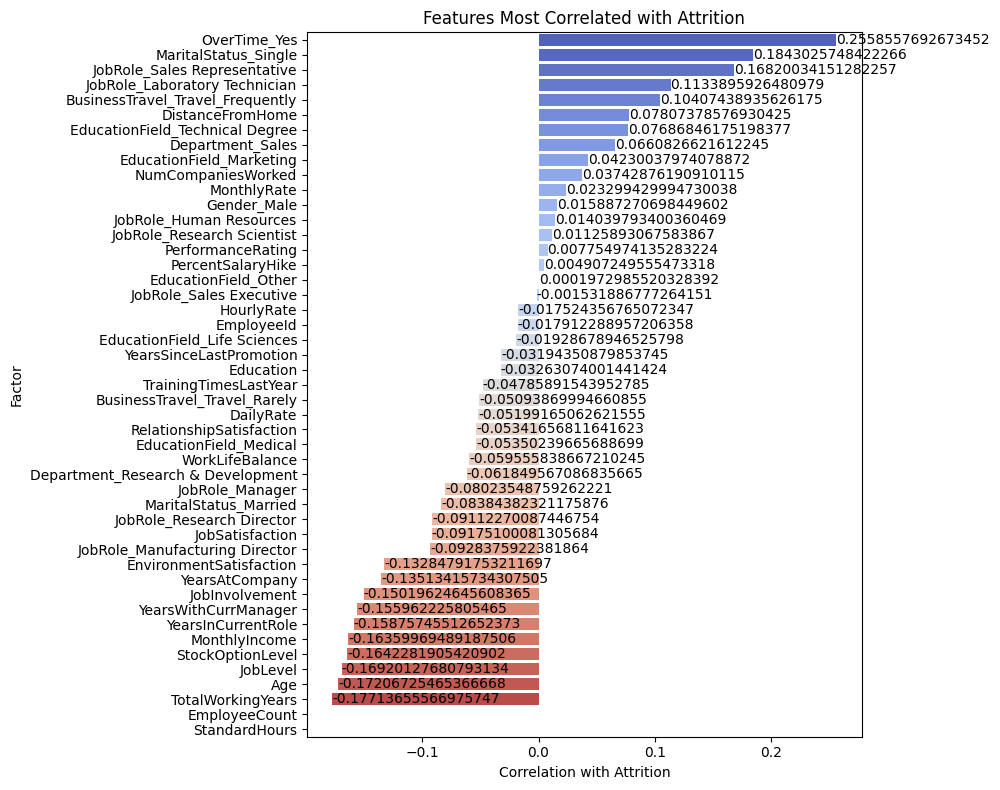

In [17]:
# Ambil korelasi dengan kolom 'Attrition'
attrition_correlation = correlation_matrix["Attrition"].sort_values(ascending=False)

factors = attrition_correlation
factors = factors.drop('Attrition')

# Plot the top 10 correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=factors.values, y=factors.index, hue=factors.index, palette="coolwarm")
plt.title("Features Most Correlated with Attrition")
plt.xlabel("Correlation with Attrition")
plt.ylabel("Factor")
for i, (count) in enumerate(factors.values):
    plt.text(count, i, str(count), va='center')
plt.tight_layout()
plt.show()

## Modeling

In [18]:
categorical_cols = df_cleaned.select_dtypes(include='object').columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

<ipython-input-19-5b49df7fc177>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])


In [20]:
from sklearn.preprocessing import  OneHotEncoder
data_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)
#Mengubah nilai True dan False menjadi 1 dan 0
data_encoded = data_encoded.astype(int)
data_encoded.head()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1,-1,0,2,0,0,0,0,-1,0,-2,...,0,0,0,0,0,0,0,1,0,0
2,-1,1,2,1,0,1,0,-1,-1,0,...,0,0,0,0,1,0,0,1,0,1
3,-1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6,-1,0,0,0,0,0,0,0,0,-2,...,0,0,0,0,0,1,0,1,0,1
7,-1,1,2,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1


In [21]:
#Memisahkan fitur dan label
X = data_encoded.drop('Attrition', axis=1)
y = data_encoded['Attrition']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1058
Total # of sample in train dataset: 846
Total # of sample in test dataset: 212


In [24]:
# Memeriksa bentuk data latih dan data uji
print("Data latih (X_train):", X_train.shape)
print("Data uji (X_test):", X_test.shape)
print("Target latih (y_train):", y_train.shape)
print("Target uji (y_test):", y_test.shape)

Data latih (X_train): (846, 47)
Data uji (X_test): (212, 47)
Target latih (y_train): (846,)
Target uji (y_test): (212,)


In [25]:
# Melihat distribusi target pada data latih dan data uji
print("Distribusi target pada data latih:")
print(y_train.value_counts(normalize=True))

print("\nDistribusi target pada data uji:")
print(y_test.value_counts(normalize=True))

Distribusi target pada data latih:
Attrition
0    0.830969
2    0.169031
Name: proportion, dtype: float64

Distribusi target pada data uji:
Attrition
0    0.830189
2    0.169811
Name: proportion, dtype: float64


In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

# Prediksi dengan Logistic Regression
y_pred_lr = lr.predict(X_test)

## Evaluation

In [27]:
# Prediksi pada data uji
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

# Evaluasi hasil
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_proba))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[167   9]
 [ 20  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       176
           2       0.64      0.44      0.52        36

    accuracy                           0.86       212
   macro avg       0.77      0.70      0.72       212
weighted avg       0.85      0.86      0.85       212


AUC-ROC Score: 0.8478535353535354

Accuracy Score: 0.8632075471698113


In [28]:
# Menyimpan model yang dilatih
joblib.dump(lr, 'attrition_model.pkl')

['attrition_model.pkl']

In [29]:
pip freeze > requirements.txt